In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import wrangle
import seaborn as sns
import scipy.stats as stats
import viz
from sklearn.cluster import KMeans

# acquire
from env import host, user, password
from pydataset import data

# custom visuals for this lesson
import viz_kmeans

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

### Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    - a. Choose features other than the ones used in the lesson.
    - b. Visualize the results of your clustering.
    - c. Use the elbow method to visually select a good value for k.
    - d. Repeat the clustering, this time with 3 different features.

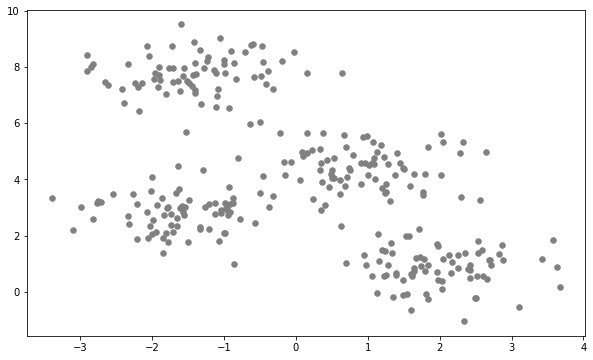

In [2]:
# visualize some data 
viz_kmeans.make_blob()

In [3]:
# Import Data

iris = data('iris')
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


    - a. Choose features other than the ones used in the lesson.

In [5]:
X = iris [['sepal_width', 'petal_width']]
X.head(3)

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2


array([[<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

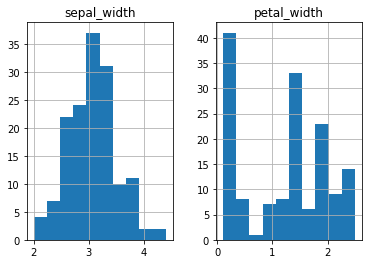

In [6]:
X.hist()

In [7]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [8]:
# Look at the head

X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [9]:
# sklearn implementation of KMeans

# DEFINE
kmeans = KMeans(n_clusters=3, random_state = 123)

# FIT
kmeans.fit(X_scaled)

# PREDICT
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [11]:
# Make a new column cluster in iris and X_scaled

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [12]:
# Random samples
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
39,4.4,3.0,1.3,0.2,setosa,0
95,5.6,2.7,4.2,1.3,versicolor,1
64,6.1,2.9,4.7,1.4,versicolor,1
111,6.5,3.2,5.1,2.0,virginica,2
106,7.6,3.0,6.6,2.1,virginica,2
76,6.6,3.0,4.4,1.4,versicolor,2
46,4.8,3.0,1.4,0.3,setosa,0
40,5.1,3.4,1.5,0.2,setosa,0
69,6.2,2.2,4.5,1.5,versicolor,1
19,5.7,3.8,1.7,0.3,setosa,0


    - b. Visualize the results of your clustering.

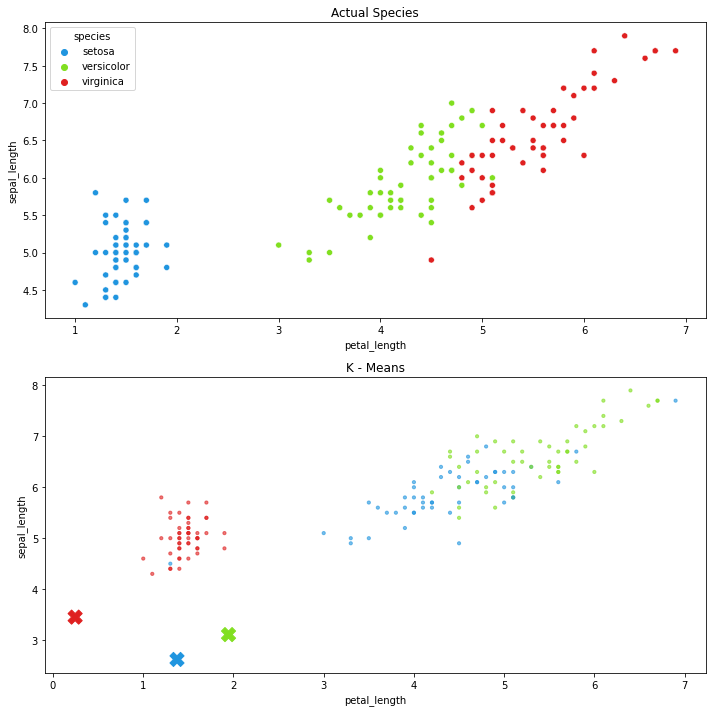

In [13]:
# Visualize scatter plot for Actual vs Predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

#### Attributes for Kmeans:
    - clustercenters: The center point of each cluster (aka centroids).
    - labels_: The labels for each observation.
    - inertia_: Sum of squared distances of samples to their closest cluster center.

In [14]:
# Cluster Centers ada centroids. The output is scaled!

kmeans.cluster_centers_

array([[ 0.90625492, -1.25634413],
       [-1.00672719,  0.22991755],
       [ 0.11627194,  0.98166637]])

In [15]:
# Make a DataFrame
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.006727,0.229918
2,0.116272,0.981666


In [16]:
# Centroids for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,2.620000,1.374000
2,3.107843,1.945098


In [17]:
#. Another way to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[3.45102041, 0.24489796],
       [2.62      , 1.374     ],
       [3.10784314, 1.94509804]])

In [18]:
# Labels (same as from predict)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

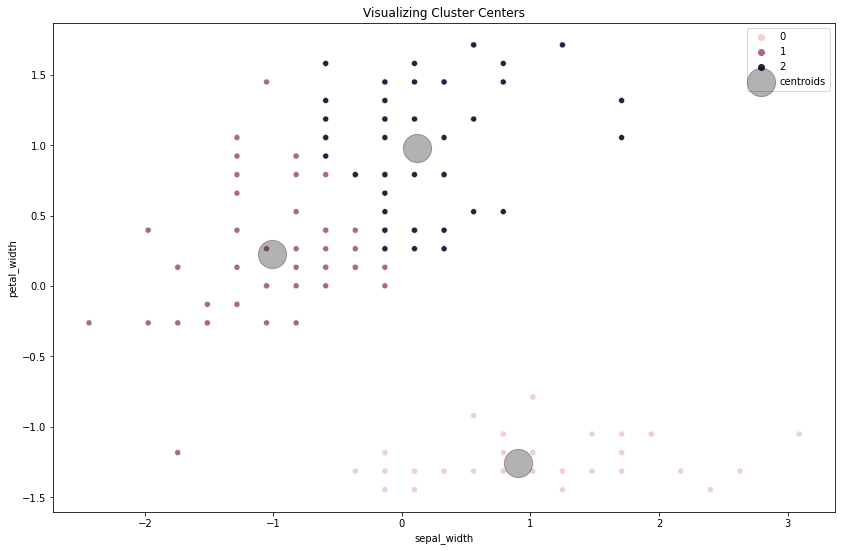

In [19]:
# Visualize the clusters along with the centers on scaled data

plt.figure(figsize=(14, 9))

# Scatterplot of the data with hue for cluster
sns.scatterplot(x = 'sepal_width', y = 'petal_width', data = X_scaled, hue = 'cluster')

# Plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'sepal_width', y = 'petal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

In [20]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


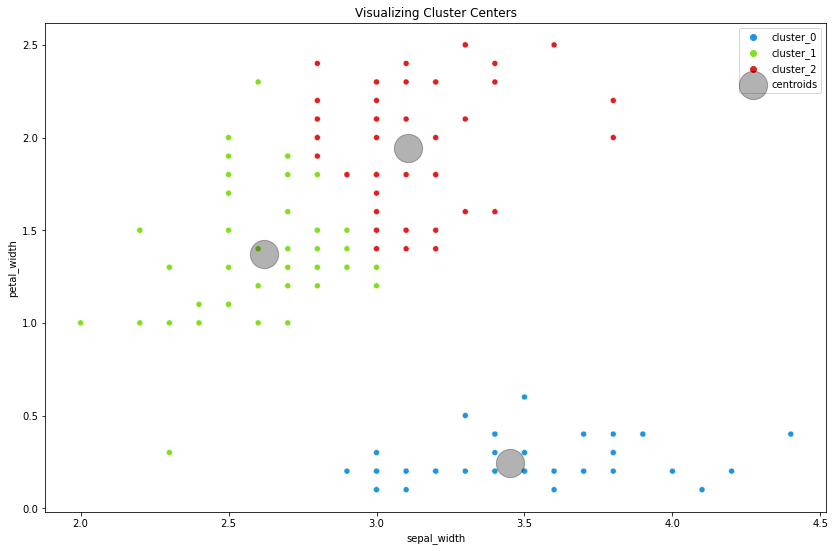

In [21]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'sepal_width', y ='petal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'sepal_width', y = 'petal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

In [22]:
X = iris[['sepal_width', 'petal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

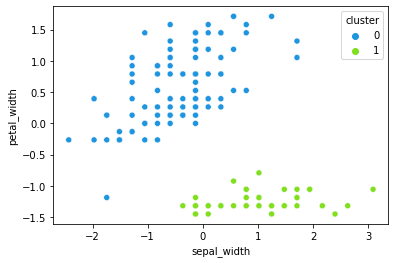

In [23]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='sepal_width', y='petal_width', data = X_scaled, hue = 'cluster')

    - c. Use the elbow method to visually select a good value for k.

In [24]:
# kmeans object has 'interia' attribute
kmeans.inertia_

125.36847212365322

In [25]:
X = iris[['sepal_width', 'petal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

In [26]:
# interia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23480116760695

In [27]:
# interia with k = 3
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.25282353560074

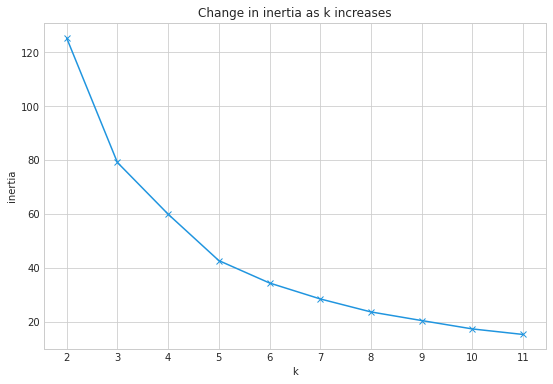

In [28]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

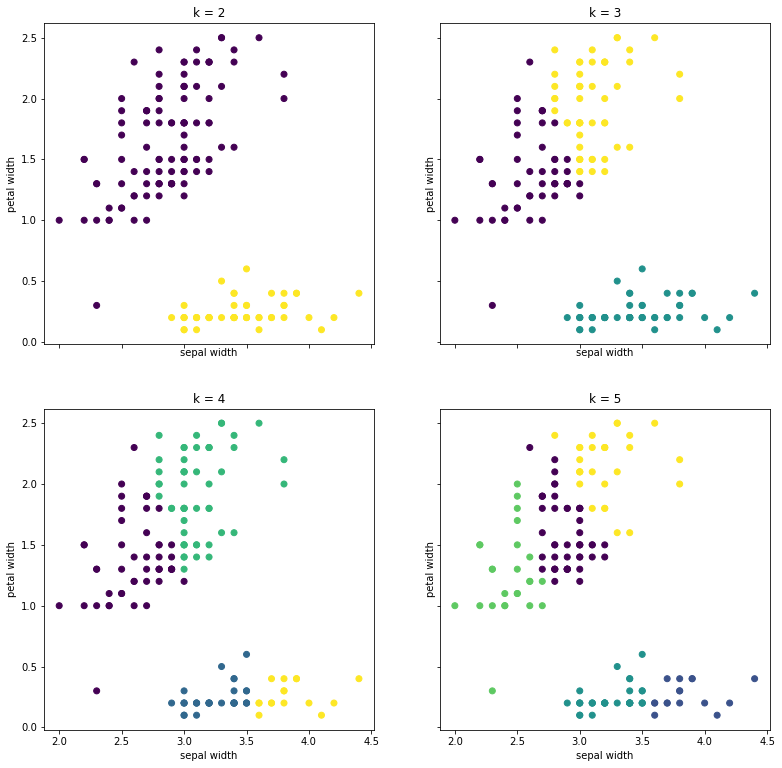

In [30]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

    - d. Repeat the clustering, this time with 3 different features.

### 2.  Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

### 3.  How does scaling impact the results of clustering?

#### Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.